In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
#Checking the number of nan values

In [4]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [6]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
128     6
104     6
134     6
65      5
74      5
102     5
85      5
94      5
95      5
103     5
168     5
93      4
118     4
122     4
148     4
106     4
137     3
115     3
101     3
125     3
83      3
154     3
153     2
164     2
110     2
87      2
192     2
188     2
158     2
89      2
194     2
129     2
119     2
81      2
145     2
197     2
108     2
113     2
90      1
77      1
186     1
98      1
78      1
107     1
121     1
231     1
256     1
142     1
Name: normalized-losses, dtype: int64

In [7]:
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
62      6
88      6
114     6
160     6
101     6
76      5
145     5
97      5
102     5
82      5
84      5
111     4
92      4
86      4
123     4
121     3
207     3
182     3
90      3
85      3
73      3
152     3
184     2
162     2
161     2
176     2
56      2
112     2
94      2
?       2
52      2
100     2
155     2
156     2
154     1
200     1
115     1
48      1
72      1
60      1
64      1
58      1
106     1
120     1
135     1
134     1
143     1
140     1
78      1
288     1
55      1
262     1
142     1
175     1
Name: horsepower, dtype: int64

# Handling the Nan values

In [8]:
#Replacing the values with np.nan
df["normalized-losses"].replace("?", np.nan, inplace=True)
df["horsepower"].replace("?", np.nan, inplace=True)

#Changing the datatype
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")

#Getting the mean value
nmean = df["normalized-losses"].mean()
hmean = df["horsepower"].mean()

#Filling the missing values with mean values
df["normalized-losses"].fillna(nmean , inplace=True)
df["horsepower"].fillna(hmean , inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


 - It is observed that the datatype of columns containing numeric values now have proper datatype.
 - Also the operation of handling nan values is performed succesfully.

# Outliers

- Extracting the outliers with the help of boxplot.

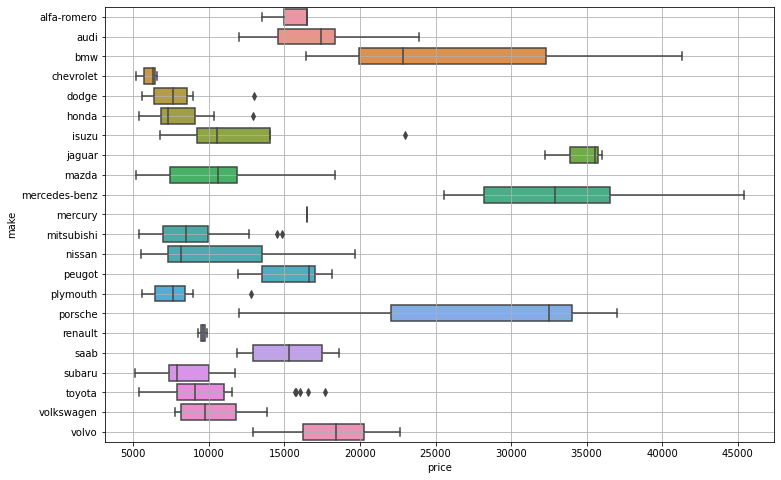

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df , x="price" , y="make")
plt.grid(True)
plt.show()

### Droping the rows containing outliers and cleaning the data.

In [11]:
df[(df["make"]=="dodge") & (df["price"]>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [12]:
df.drop(29, inplace=True)

In [13]:
df[(df["make"]=="honda") & (df["price"]>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [14]:
df.drop(41, inplace=True)

In [15]:
df[(df["make"]=="isuzu") & (df["price"]>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [16]:
df.drop(45, inplace=True)

In [17]:
df[(df["make"]=="mitsubishi") & (df["price"]>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [18]:
df.drop([83,84], inplace=True)

In [19]:
df[(df["make"]=="plymouth") & (df["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [20]:
df.drop(124, inplace=True)

In [21]:
df[(df["make"]=="toyota") & (df["price"]>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [22]:
df.drop([172,178,179,180,181], inplace=True)

# Encoding the cleaned data.

In [23]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

In [24]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [25]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [28]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


 - Succesfully converted categorical data into numerical data using LabelEncoder.

# Creating new df by combining df_cat & df_num

In [29]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [30]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [31]:
df = pd.concat([df_cat, df_num], axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               194 non-null    int32  
 1   fuel-type          194 non-null    int32  
 2   body-style         194 non-null    int32  
 3   drive-wheels       194 non-null    int32  
 4   engine-location    194 non-null    int32  
 5   engine-type        194 non-null    int32  
 6   symboling          194 non-null    int64  
 7   normalized-losses  194 non-null    float64
 8   width              194 non-null    float64
 9   height             194 non-null    float64
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(4), int32(6), int64(5)
memory usage: 19.7 KB


In [83]:
df.describe()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.00000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,12.134021,0.896907,2.634021,1.314433,0.015464,3.07732,0.788660,121.402062,65.892268,53.822165,125.628866,102.430476,25.412371,30.984536,13087.304124
std,6.290265,0.304867,0.848697,0.556728,0.123708,0.99178,1.200896,31.406299,2.189327,2.448045,42.036826,39.307294,6.546371,6.882039,8075.197621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,8.000000,1.000000,2.000000,1.000000,0.000000,3.00000,0.000000,101.000000,64.000000,52.000000,97.000000,70.000000,19.250000,25.000000,7747.250000
50%,12.000000,1.000000,3.000000,1.000000,0.000000,3.00000,1.000000,122.000000,65.400000,54.100000,110.000000,95.000000,25.000000,30.500000,9992.000000
75%,19.000000,1.000000,3.000000,2.000000,0.000000,3.00000,2.000000,137.000000,66.900000,55.675000,140.750000,116.000000,30.000000,36.000000,16500.000000
max,21.000000,1.000000,4.000000,2.000000,1.000000,6.00000,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


# EDA & Preprocessing

In [33]:
from scipy.stats import skew

make
-0.23436463409363628


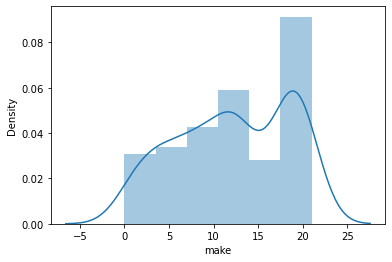

fuel-type
-2.6105444889401226


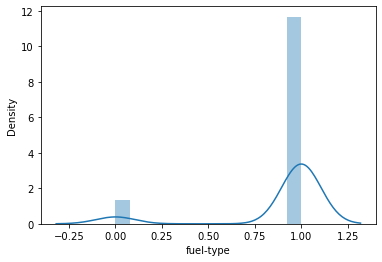

body-style
-0.6531388693992309


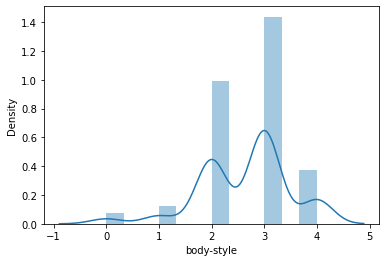

drive-wheels
-0.04391416479065971


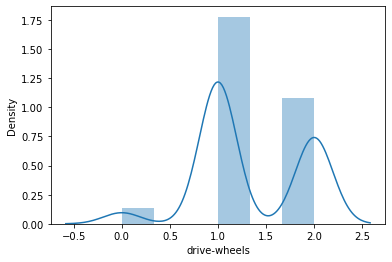

engine-location
7.853812671113911


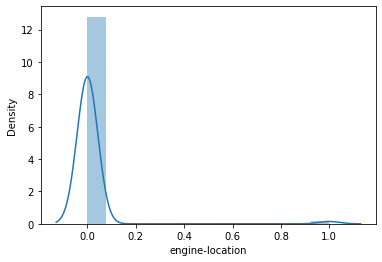

engine-type
-0.28288874330760644


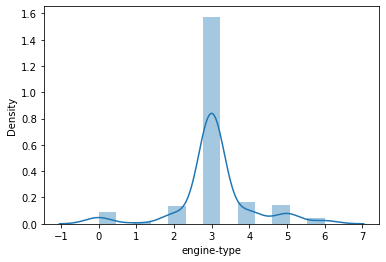

symboling
0.21386866184357742


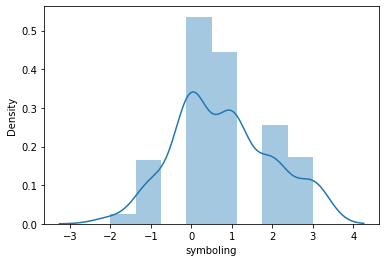

normalized-losses
0.848205953606264


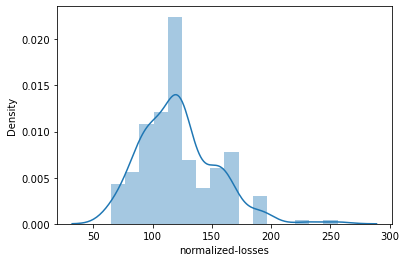

width
0.9140400320504322


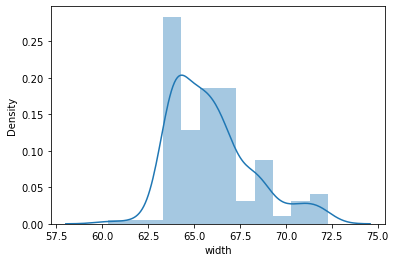

height
0.013839962443639326


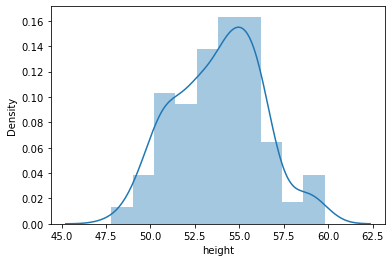

engine-size
2.0541257626466156


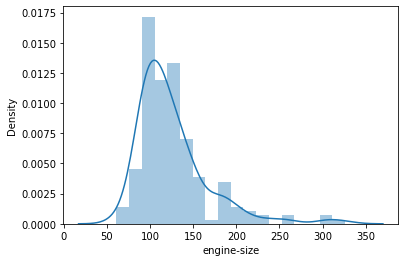

horsepower
1.5556576549504106


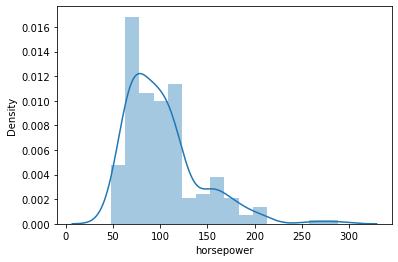

city-mpg
0.5999073033714895


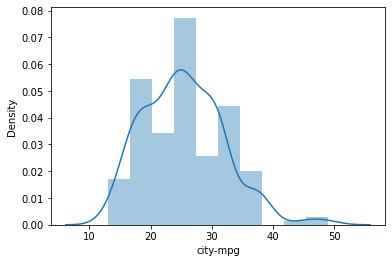

highway-mpg
0.4760310091695327


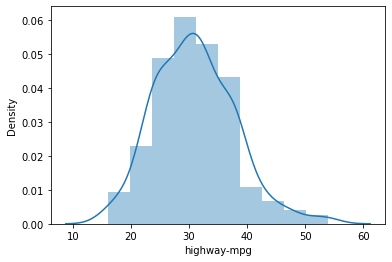

price
1.8166794702973463


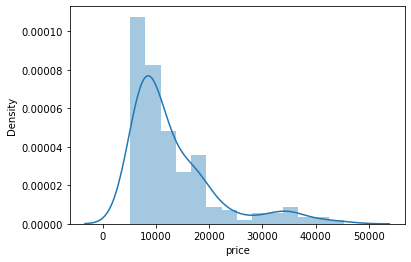

In [34]:
for col in df:
    print(col)
    print(skew( df[col] ))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

<AxesSubplot:>

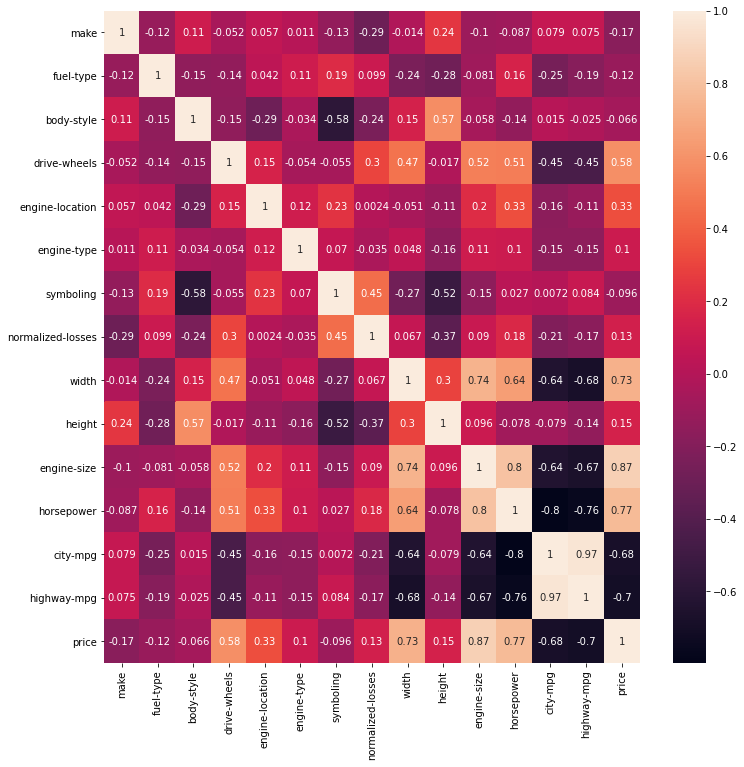

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr() , annot=True)

In [36]:
df.corr()["price"].sort_values()

highway-mpg         -0.704846
city-mpg            -0.680412
make                -0.173792
fuel-type           -0.115791
symboling           -0.095905
body-style          -0.065831
engine-type          0.102758
normalized-losses    0.129973
height               0.147010
engine-location      0.333620
drive-wheels         0.584485
width                0.730503
horsepower           0.768921
engine-size          0.869638
price                1.000000
Name: price, dtype: float64

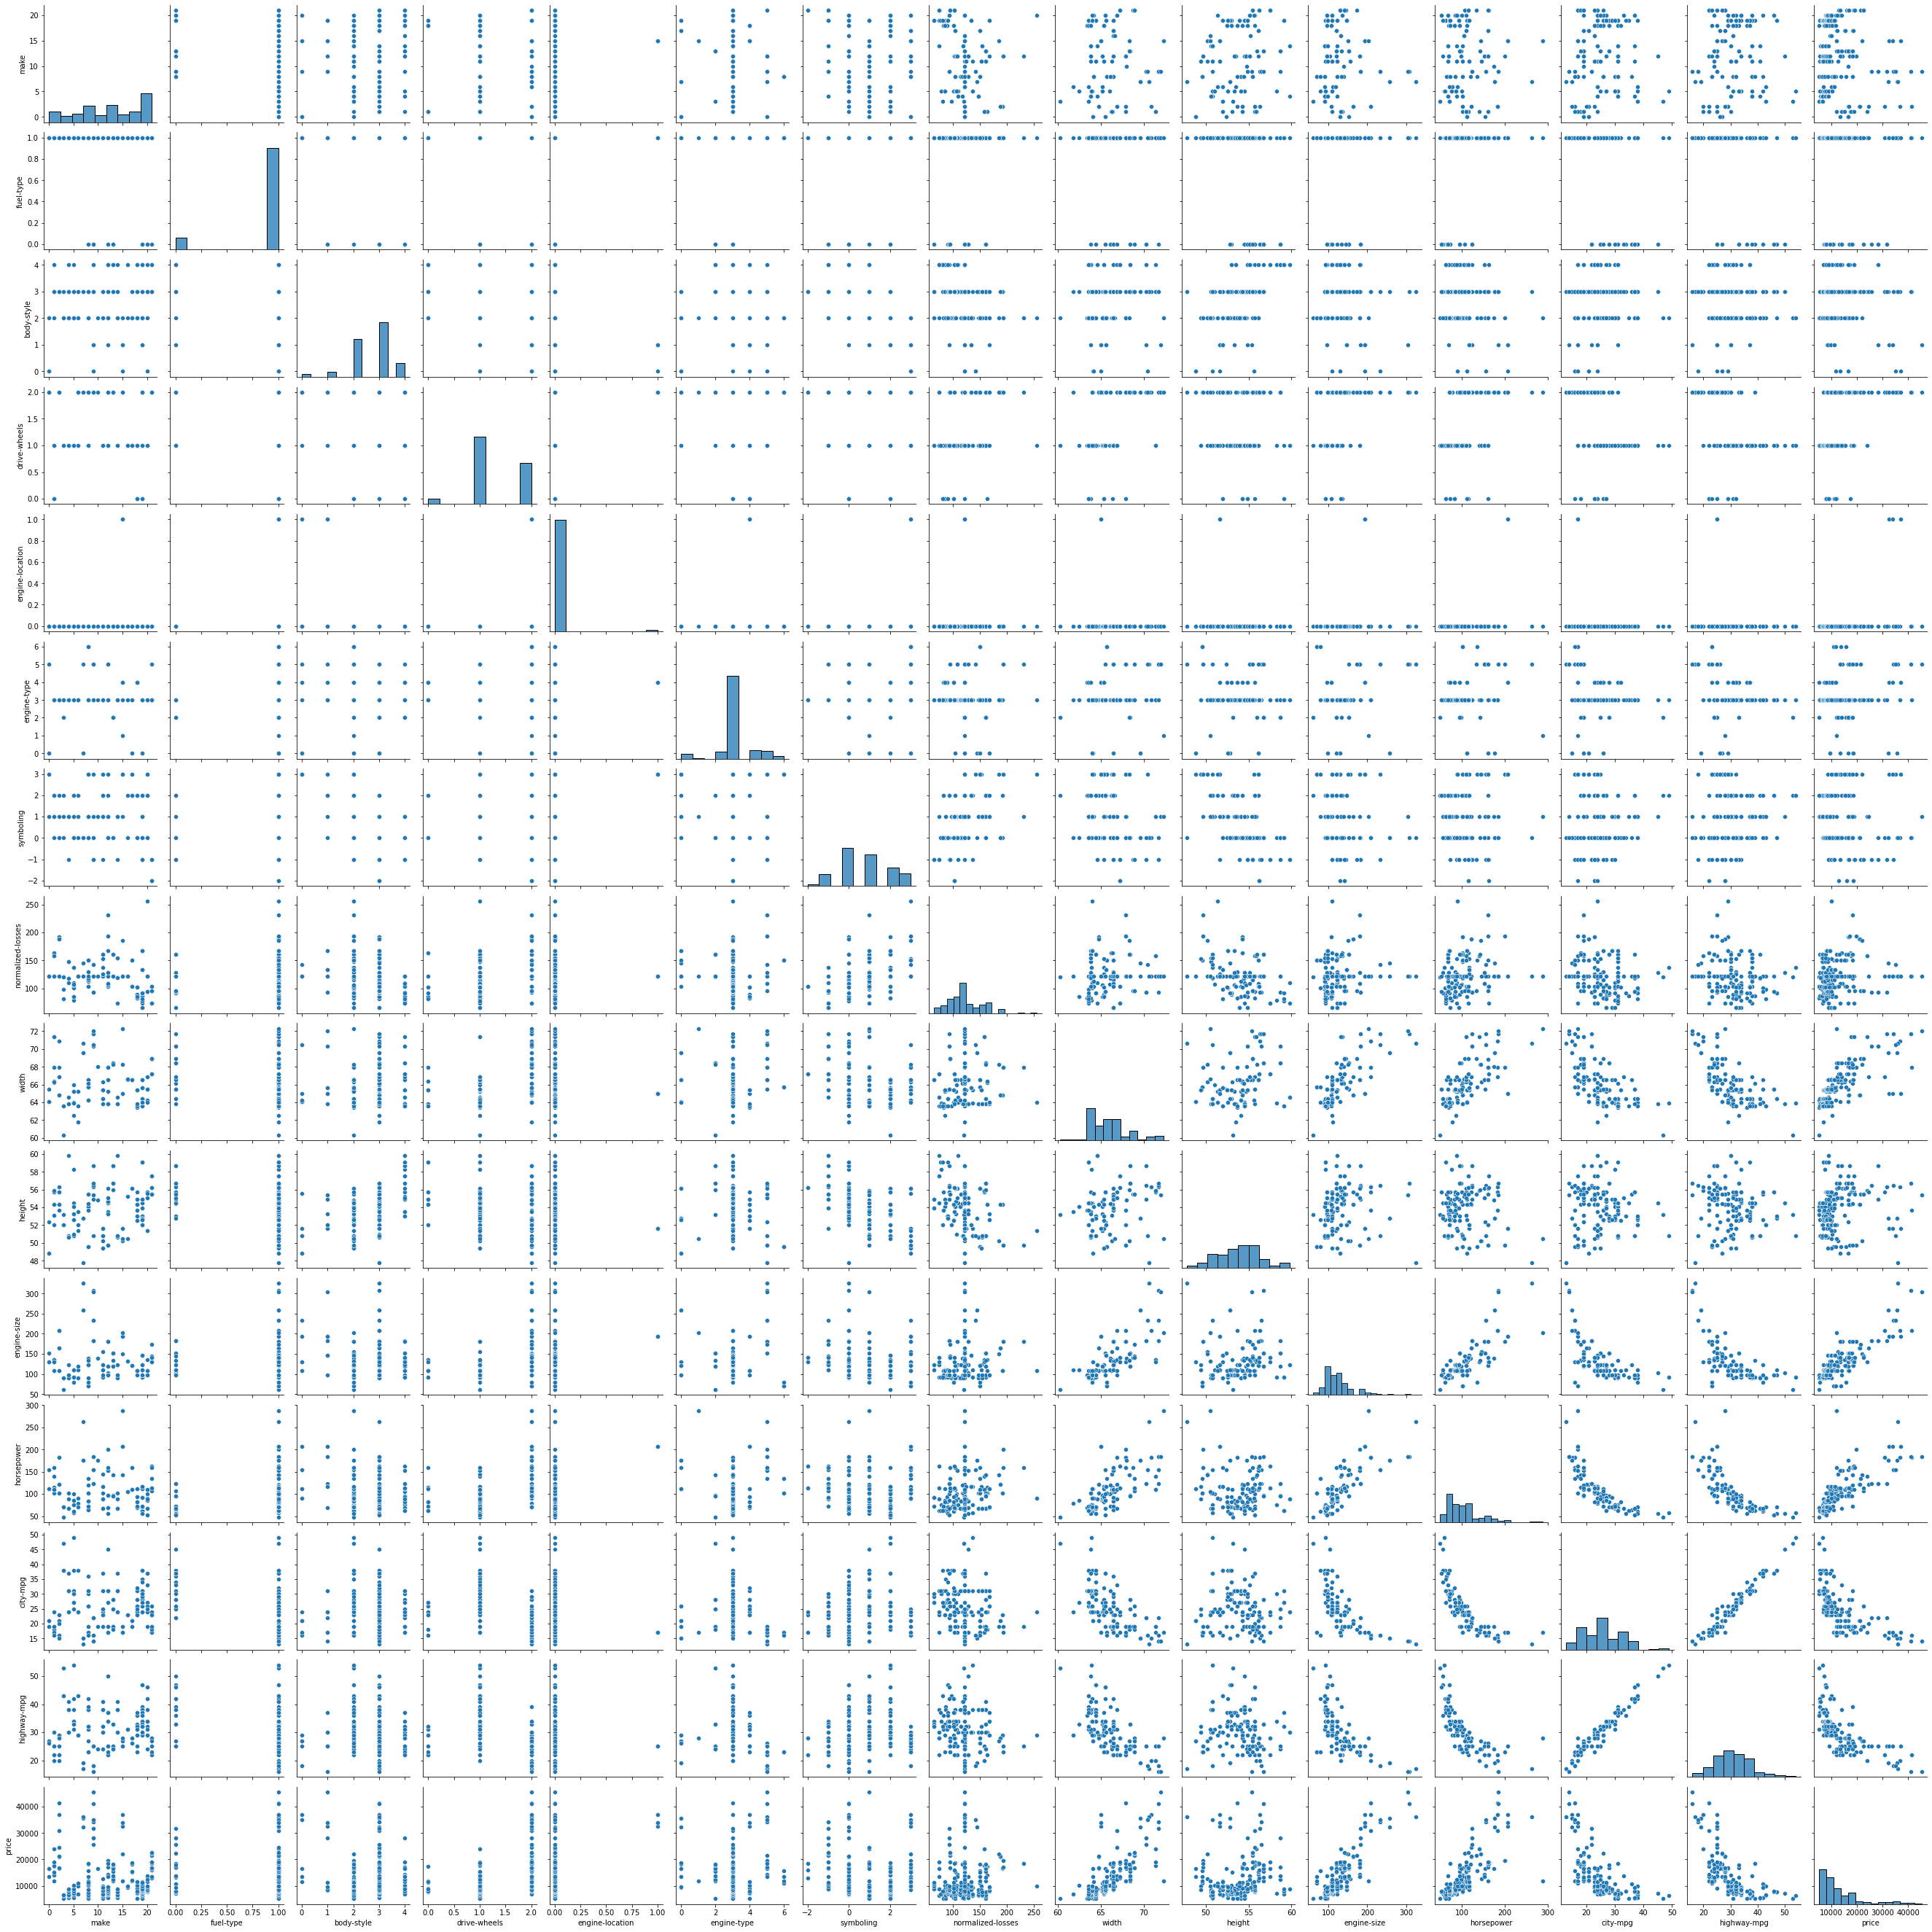

In [37]:
sns.pairplot(df)

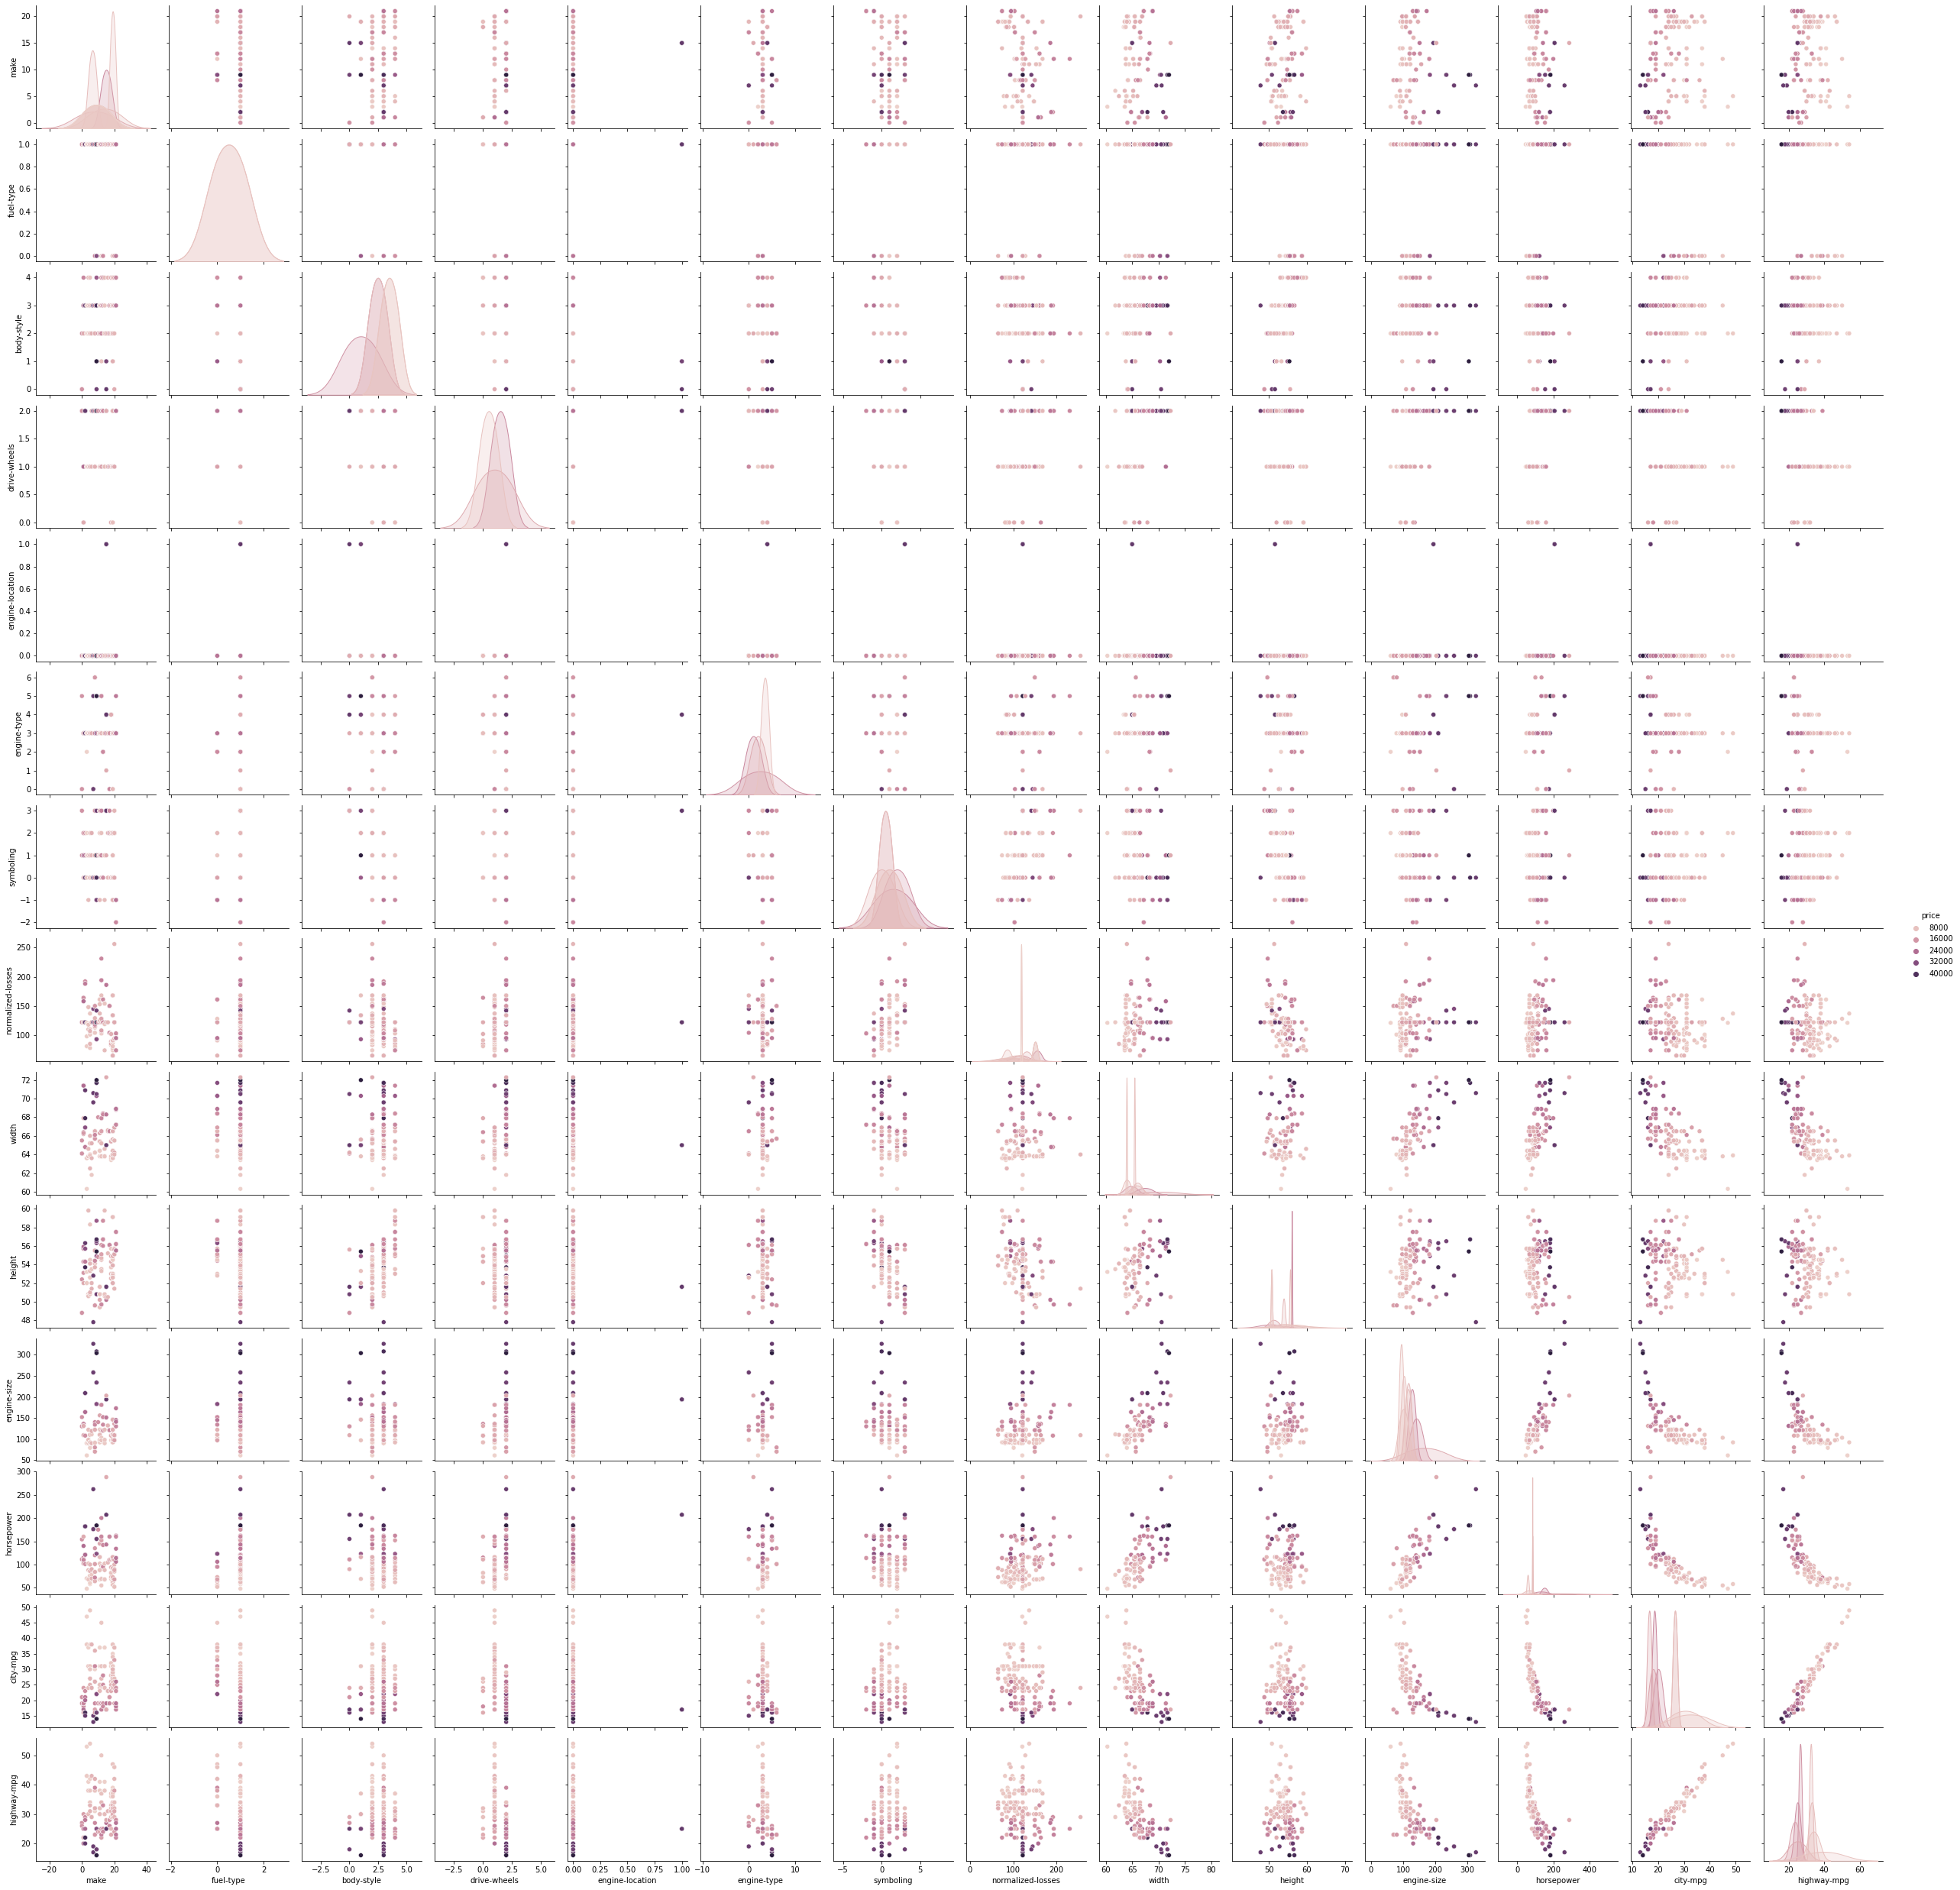

In [38]:
sns.pairplot(data=df , hue="price")

# Model Creation

In [39]:
df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [40]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [42]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    ac = r2_score(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mse)
    
    train = model.score(xtrain,ytrain)
    test = r2_score(ytest,ypred)
    
    print(f"Training accuracy :- {train}")
    print(f"Testing accuracy  :- {test}")
    print()
    print(f"R2_score :- \n{ac}\n\nMAE :-\n{mae}\n\nMSE :-\n{mse}\n\nRMSE :-\n{rmse}")

In [75]:
models = []

models.append(("Linreg        :- ", LinearRegression()))
models.append(("KNN           :- ", KNeighborsRegressor()))
models.append(("SVM-l         :- ", SVR(kernel="linear")))
models.append(("SVM-r         :- ", SVR(kernel="rbf")))
models.append(("DT         :- ", DecisionTreeRegressor(min_samples_leaf=1, random_state=1)))
models.append(("DT         :- ", DecisionTreeRegressor(max_depth=1, random_state=1)))


for name, model in models:
    print(name)
    mymodel(model)
    print("\n\n\n")

Linreg        :- 
Training accuracy :- 0.8941185334320063
Testing accuracy  :- 0.7355527822266537

R2_score :- 
0.7355527822266537

MAE :-
3184.5155994121515

MSE :-
21864056.153787263

RMSE :-
4675.901640730615




KNN           :- 
Training accuracy :- 0.9158165653923884
Testing accuracy  :- 0.6671791815444368

R2_score :- 
0.6671791815444368

MAE :-
3298.7692307692305

MSE :-
27517071.743589748

RMSE :-
5245.671715194323




SVM-l         :- 
Training accuracy :- 0.8339318161071796
Testing accuracy  :- 0.6151716897711921

R2_score :- 
0.6151716897711921

MAE :-
3860.550037158177

MSE :-
31816964.667864848

RMSE :-
5640.652858301497




SVM-r         :- 
Training accuracy :- -0.13936583233415778
Testing accuracy  :- -0.1791158963225512

R2_score :- 
-0.1791158963225512

MAE :-
5925.926834043423

MSE :-
97487341.27774158

RMSE :-
9873.56780894027




DT         :- 
Training accuracy :- 0.9957182589267636
Testing accuracy  :- 0.7689730487200579

R2_score :- 
0.7689730487200579

MAE :-


### Hyperparameter Tuning

#### KNN

In [44]:
accuracy=[]

for i in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain , ytrain)
    ypred = knn.predict(xtest)
    accuracy.append(r2_score(ytest,ypred))

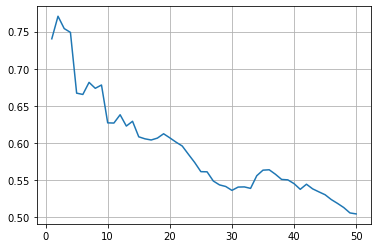

In [45]:
plt.plot(range(1,51),accuracy)
plt.grid(True)
plt.show()

#### Linear Regression

In [46]:
nl2 = []
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    nl2.append((i,l2.score(xtest,ytest)))

nl2

[(0, 0.7355527822266543),
 (1, 0.7016542422732281),
 (2, 0.6847205630664456),
 (3, 0.6751690951781149),
 (4, 0.6689336369274135),
 (5, 0.6644614007235592),
 (6, 0.6610439498857883),
 (7, 0.6583127977364198),
 (8, 0.6560570137239903),
 (9, 0.6541467733216799),
 (10, 0.6524975027598207),
 (11, 0.6510515309727207),
 (12, 0.6497680257188643),
 (13, 0.6486171525383218),
 (14, 0.6475765216649285),
 (15, 0.6466289392910423),
 (16, 0.6457609352149597),
 (17, 0.6449617700485919),
 (18, 0.6442227483265888),
 (19, 0.6435367323275265),
 (20, 0.6428977909174949),
 (21, 0.6423009412692836),
 (22, 0.6417419557549824),
 (23, 0.6412172154047594),
 (24, 0.6407235971861645),
 (25, 0.6402583862165862),
 (26, 0.6398192066102026),
 (27, 0.639403966428487),
 (28, 0.6390108134298362),
 (29, 0.6386380991777165),
 (30, 0.6382843496833958),
 (31, 0.6379482412052111),
 (32, 0.6376285801525738),
 (33, 0.6373242862842188),
 (34, 0.6370343785705443),
 (35, 0.636757963226026),
 (36, 0.6364942235212865),
 (37, 0.63624

In [47]:
nl1 = []
for i in range(100):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    nl1.append((i,l1.score(xtest,ytest)))

nl1

[(0, 0.7355527822266535),
 (1, 0.7349043968321456),
 (2, 0.734224129247808),
 (3, 0.7335119482950561),
 (4, 0.7327678216112494),
 (5, 0.7319918069060299),
 (6, 0.7311838864554618),
 (7, 0.7303440009125781),
 (8, 0.7294722457664095),
 (9, 0.728568558705089),
 (10, 0.7276329142276274),
 (11, 0.7266654426694357),
 (12, 0.7256659278294073),
 (13, 0.7246344541902952),
 (14, 0.7235711776815625),
 (15, 0.7224758377877629),
 (16, 0.7213487164982898),
 (17, 0.7201895305351079),
 (18, 0.7189984282153095),
 (19, 0.7177754221166048),
 (20, 0.7165203766929641),
 (21, 0.71523345414556),
 (22, 0.7139146862983363),
 (23, 0.7125639314145946),
 (24, 0.7111812791847517),
 (25, 0.7097664480053986),
 (26, 0.7083200026249673),
 (27, 0.7068417949659476),
 (28, 0.7053387530630352),
 (29, 0.703825264895338),
 (30, 0.7022833223294923),
 (31, 0.7007156529267059),
 (32, 0.6991170851658983),
 (33, 0.6974860191261013),
 (34, 0.6958241390246818),
 (35, 0.6941295302583039),
 (36, 0.6924042214194559),
 (37, 0.69064610

#### Decision Tree

In [77]:
accuracy=[]
for i in range(1,11):
    dt=DecisionTreeRegressor(max_depth=i, random_state=i)
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    ac= r2_score(ytest,ypred)
    accuracy.append(ac)

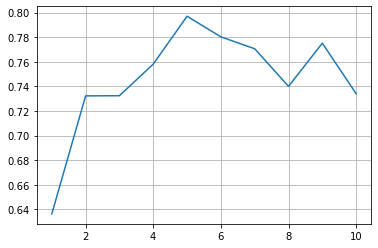

In [78]:
plt.plot(range(1,11),accuracy1)
plt.grid(True)
plt.show()

In [79]:
accuracy=[]
for i in range(1,11):
    dt=DecisionTreeRegressor(min_samples_leaf=i, random_state=i)
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    ac= r2_score(ytest,ypred)
    accuracy.append(ac)

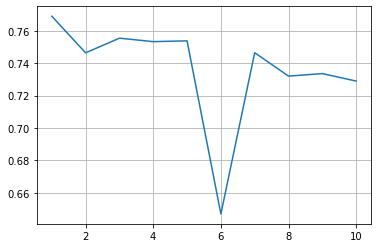

In [80]:
plt.plot(range(1,11),accuracy)
plt.grid(True)
plt.show()

### Recreating the models

In [81]:
models = []

models.append(("Linreg        :- ", LinearRegression()))
models.append(("KNN           :- ", KNeighborsRegressor(n_neighbors=1)))
models.append(("SVM-l         :- ", SVR(kernel="linear")))
models.append(("SVM-r         :- ", SVR(kernel="rbf")))
models.append(("DT         :- ", DecisionTreeRegressor(min_samples_leaf=1, random_state=1)))
models.append(("DT         :- ", DecisionTreeRegressor(max_depth=5, random_state=5)))



for name, model in models:
    print(name)
    mymodel(model)
    print("\n\n\n")

Linreg        :- 
Training accuracy :- 0.8941185334320063
Testing accuracy  :- 0.7355527822266537

R2_score :- 
0.7355527822266537

MAE :-
3184.5155994121515

MSE :-
21864056.153787263

RMSE :-
4675.901640730615




KNN           :- 
Training accuracy :- 0.9928862905865443
Testing accuracy  :- 0.74027773895488

R2_score :- 
0.74027773895488

MAE :-
2592.5384615384614

MSE :-
21473404.589743588

RMSE :-
4633.940503474725




SVM-l         :- 
Training accuracy :- 0.8339318161071796
Testing accuracy  :- 0.6151716897711921

R2_score :- 
0.6151716897711921

MAE :-
3860.550037158177

MSE :-
31816964.667864848

RMSE :-
5640.652858301497




SVM-r         :- 
Training accuracy :- -0.13936583233415778
Testing accuracy  :- -0.1791158963225512

R2_score :- 
-0.1791158963225512

MAE :-
5925.926834043423

MSE :-
97487341.27774158

RMSE :-
9873.56780894027




DT         :- 
Training accuracy :- 0.9957182589267636
Testing accuracy  :- 0.7689730487200579

R2_score :- 
0.7689730487200579

MAE :-
2474

# Cross Validation Score

In [82]:
print("Name              Accuracy                  STD")
for name, model in models:
    cvs = cross_val_score(model, x, y, cv=5,)
    print(f"{name} {cvs.mean()} {cvs.std()}")

Name              Accuracy                  STD
Linreg        :-  0.5155626638216251 0.29417502732645967
KNN           :-  0.3998279418728215 0.3576296707751772
SVM-l         :-  0.5323432027166152 0.33526075240067404
SVM-r         :-  -0.1881168806138271 0.13892274676036426
DT         :-  -0.15043384478772265 1.578017259394233
DT         :-  0.2602309430475619 0.8201469091885032
